In [1]:
# import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Import dataset
data = pd.read_csv("data/kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [150]:
data['date'] = pd.to_datetime(data['date']) # If your Date column is of the type object otherwise skip thisdf['Date'] = pd.to_datetime(df['Date']) # If your Date column is of the type object otherwise skip this
date_range = str(data['date'].dt.date.min()) + ' to ' +str(data['date'].dt.date.max())
date_range

'2021-06-10 to 2022-06-09'

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034184,-0.006306,-0.012094,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,-0.041625,0.023071,-0.029131,-0.000691,0.000479
price,-0.034184,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,0.313409,0.096013,0.084786,0.063632,-0.022509
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,0.183439,0.146191,0.014286,0.108758,-0.106689
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,0.327551,0.443648,0.040631,-0.005225,0.017400
sqft_living,-0.027932,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,0.396030,0.291694,0.038499,0.102186,-0.087669
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,0.155250,0.001750,0.010049,0.030020,-0.034308
floors,0.032043,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,0.125183,0.544646,-0.025449,-0.218554,0.233781
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,0.312117,0.387448,0.010598,0.092258,-0.082744
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,0.210500,-0.230226,0.053634,0.059788,-0.045208
sqft_garage,-0.007829,0.264169,0.319441,0.457022,0.511740,0.087169,0.132656,0.560551,0.026361,1.000000,0.216354,0.447560,-0.098603,0.092346,-0.096861


# Initial Look at Data to Get Information

In [5]:
data['sqft_above'].value_counts()

1200    282
1300    282
1060    271
1100    268
1250    265
       ... 
1799      1
1783      1
1767      1
7700      1
2049      1
Name: sqft_above, Length: 1187, dtype: int64

In [6]:
data['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [7]:
data['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [8]:
data['sewer_system'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
30150    False
30151    False
30152    False
30153    False
30154    False
Name: sewer_system, Length: 30155, dtype: bool

# One duplicate in ID, a few nulls in 'Sewer_system' and 'heat_source', could drop these since there are only a few

### Dropping the duplicated ID

In [9]:
data[data.duplicated(subset=['id'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [10]:
data[data['id'].isin(['1233100736'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [11]:
data_clean = data.drop_duplicates(subset = ['id'])
data_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


### Removing the nulls from 'sewer_System' and 'heat_source'

In [12]:
data_clean = data_clean.dropna(subset=['sewer_system', 'heat_source'])
data_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [13]:
data_clean['waterfront'].value_counts()

NO     29599
YES      511
Name: waterfront, dtype: int64

# Separating Out Zipcode from the Address

In [14]:
data_clean['address']

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
30150    4673 Eastern Avenue North, Seattle, Washington...
30151    4131 44th Avenue Southwest, Seattle, Washingto...
30152    910 Martin Luther King Jr Way, Seattle, Washin...
30153    17127 114th Avenue Southeast, Renton, Washingt...
30154    18615 7th Avenue South, Burien, Washington 981...
Name: address, Length: 30110, dtype: object

In [15]:
# This creates a new column with our zipcodes of the houses
data_clean['postal_code'] = data_clean['address'].str[-20:-15]
data_clean

<ipython-input-15-ad923d199017>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['postal_code'] = data_clean['address'].str[-20:-15]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


In [16]:
# Verify no missing values --
data_clean.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
postal_code      0
dtype: int64

In [17]:
print(data_clean['price'].sort_values(ascending = False))

23470    30750000.0
3760     23500000.0
25561    22750000.0
27175    20000000.0
18100    17800000.0
            ...    
27028       28854.0
20406       28559.0
7577        28307.0
21793       27563.0
8557        27360.0
Name: price, Length: 30110, dtype: float64


In [18]:
data_clean['price'].quantile(0.34)

720000.0

### Feature engineering, want to know the price per sqft of livable sqft

In [19]:
data_clean['price_sqft'] = data_clean['price'] / data_clean['sqft_living']
data_clean

<ipython-input-19-52a139dba789>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['price_sqft'] = data_clean['price'] / data_clean['sqft_living']


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,price_sqft
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,572.033898
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,332.129964
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,107.986111
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,358.796296
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,529.017857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,814.136126
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,650.000000
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,493.827160
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055,301.556420


In [20]:
data_clean['price_sqft'].describe()

count     30110.000000
mean        560.998151
std        3488.636387
min           6.920415
25%         360.718363
50%         492.042000
75%         644.254414
max      601000.000000
Name: price_sqft, dtype: float64

### Any homes not within King County?

In [21]:
#find any postal codes not within King County (King County begins in 98) 
prefixes = ['98']

data_clean[~data_clean.postal_code.str.startswith(tuple(prefixes))]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,price_sqft
12,1797501124,6/25/2021,750000.0,3,2.0,1280,964,3.0,NO,NO,...,0,0,380,2021,0,"5712 A Street, Omaha, Nebraska 68106, United S...",41.225811,-96.001397,68106,585.937500
53,7548300606,5/3/2022,960000.0,3,2.0,1280,1221,2.0,NO,NO,...,300,0,400,2019,0,"1820 South State Street, Vineland, New Jersey ...",39.460807,-75.015361,08360,750.000000
62,1934800106,8/24/2021,740000.0,2,2.0,1120,734,3.0,NO,NO,...,0,0,260,2021,0,"1804 Spruce Street, McLeansboro, Illinois 6285...",38.075870,-88.535760,62859,660.714286
159,856000595,7/8/2021,3730000.0,4,4.5,4820,10800,2.0,NO,NO,...,0,850,0,2006,0,"626 13th Street, Union City, New Jersey 07087,...",40.761325,-74.039020,07087,773.858921
172,1336300219,2/9/2022,759900.0,2,2.0,960,591,3.0,NO,NO,...,0,0,240,2021,0,"11th Avenue, West Babylon, New York 11704, Uni...",40.719455,-73.371935,11704,791.562500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30029,1978200468,10/28/2021,1480000.0,3,2.0,2050,1090,3.5,NO,NO,...,490,360,240,2021,0,"Avenue Cuts, 34 Ridge Rd, North Arlington, New...",40.782453,-74.137642,07031,721.951220
30044,9834201391,2/17/2022,520000.0,2,2.0,790,597,2.0,NO,NO,...,270,0,210,2021,0,"36th Avenue, Kenosha, Wisconsin 53142, United ...",42.548430,-87.851900,53142,658.227848
30116,2768100152,1/1/2022,710000.0,1,2.0,1180,616,3.0,NO,NO,...,340,0,330,2021,0,"57th Street Lane NW, Rochester, Minnesota 5590...",44.081760,-92.524610,55901,601.694915
30129,8584800130,11/18/2021,940000.0,2,2.0,1550,1026,2.5,NO,NO,...,470,230,0,2009,0,"214 B, Mount Laurel, New Jersey 08054, United ...",39.955820,-74.881130,08054,606.451613


### Appears that houses in King's County begin with Postal Code '98'

In [22]:
#find the indexes of the homes not within King County
prefixes = ['98']
non_king_postals = data_clean[~data_clean.postal_code.str.startswith(tuple(prefixes))].index
non_king_postals

#drop the rows whose postal code does not being with '98'
only_king = data_clean.drop(non_king_postals)
only_king.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,price_sqft
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,572.033898
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,332.129964
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,107.986111
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,358.796296
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,529.017857


### Create a new column with numeric grade value

In [23]:
only_king['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [24]:
#To get numeric grade code value
only_king['grade_code'] = only_king['grade'].str[0:2]

#To strip whitespace from the grade code
only_king['grade_code'] = only_king['grade_code'].str.strip()

In [25]:
#sanity check to make sure no white space
only_king['grade_code'].unique()

array(['7', '9', '8', '6', '10', '5', '11', '12', '4', '13', '3', '2'],
      dtype=object)

### Create a new column with numeric condition value

### Converting Data Types of New Columns

In [26]:
#To get numeric condition code
only_king['condition_code'] = only_king['condition']

# Replace the word to numeric value
only_king.condition_code.replace({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4,'Very Good': 5}, inplace=True)

In [27]:
#change postal code to numeric datatype
only_king['postal_code'] = only_king['postal_code'].astype(int)

#To convert to float
only_king['condition_code'] = only_king['condition_code'].astype(int)

#To convert to float
only_king['grade_code'] = only_king['grade_code'].astype(int)

In [28]:
only_king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29199 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29199 non-null  int64  
 1   date            29199 non-null  object 
 2   price           29199 non-null  float64
 3   bedrooms        29199 non-null  int64  
 4   bathrooms       29199 non-null  float64
 5   sqft_living     29199 non-null  int64  
 6   sqft_lot        29199 non-null  int64  
 7   floors          29199 non-null  float64
 8   waterfront      29199 non-null  object 
 9   greenbelt       29199 non-null  object 
 10  nuisance        29199 non-null  object 
 11  view            29199 non-null  object 
 12  condition       29199 non-null  object 
 13  grade           29199 non-null  object 
 14  heat_source     29199 non-null  object 
 15  sewer_system    29199 non-null  object 
 16  sqft_above      29199 non-null  int64  
 17  sqft_basement   29199 non-null 

In [29]:
five_king = only_king.head()

In [30]:
five_king

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,price_sqft,grade_code,condition_code
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,572.033898,7,4
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,332.129964,7,3
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,107.986111,7,3
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,358.796296,9,3
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,529.017857,7,3


### Attempting to map out these houses

In [31]:
home_locations = five_king[["lat", "long", "id"]]

In [32]:
import pandas as pd
import folium

map = folium.Map(location=[home_locations.lat.mean(), 
                           home_locations.long.mean()], zoom_start=14, control_scale=True)

map

In [33]:
for index, location_info in home_locations.iterrows():
    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info["id"]).add_to(map)

In [34]:
map

In [35]:
df = only_king.drop(columns=['date', 'condition', 'grade', 'heat_source', 'sewer_system', 'address', 
                                   'yr_renovated', 'sqft_above', 'sqft_basement', 'waterfront',
                                   'greenbelt', 'nuisance', 'view'])

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,postal_code,price_sqft,grade_code,condition_code
0,7399300360,675000.0,4,1.0,1180,7140,1.0,0,40,1969,47.461975,-122.19052,98055,572.033898,7,4
1,8910500230,920000.0,5,2.5,2770,6703,1.0,0,240,1950,47.711525,-122.35591,98133,332.129964,7,3
2,1180000275,311000.0,6,2.0,2880,6156,1.0,0,0,1956,47.502045,-122.22520,98178,107.986111,7,3
3,1604601802,775000.0,3,3.0,2160,1400,2.0,200,270,2010,47.566110,-122.29020,98118,358.796296,9,3
4,8562780790,592500.0,2,2.0,1120,758,2.0,550,30,2012,47.532470,-122.07188,98027,529.017857,7,3


### Cleaning price to get rid of outliers
- We utilize the Interqurtile range to rid outliers via the formula
- Below: Q1 - 1.5 IQR
- Above: Q3 + 1.5 IQR

In [36]:
df['price'].describe()

count    2.919900e+04
mean     1.112959e+06
std      8.954250e+05
min      2.736000e+04
25%      6.450000e+05
50%      8.680000e+05
75%      1.310000e+06
max      3.075000e+07
Name: price, dtype: float64

In [37]:
df['price'].quantile(.75)

1310000.0

In [38]:
(df['price'].quantile(.25))

645000.0

In [39]:
IQR = df['price'].quantile(.75) - df['price'].quantile(.25)
IQR

665000.0

In [40]:
upper_limit = df['price'].quantile(.75) + (1.5 * IQR)
upper_limit

2307500.0

In [41]:
lower_limit = df['price'].quantile(.25) - (1.5 * IQR)
lower_limit

-352500.0

In [42]:
df[df['price'] >= 2307500]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,postal_code,price_sqft,grade_code,condition_code
27,5424700190,4500000.0,4,3.0,2760,13150,1.5,0,160,1954,47.615710,-122.223990,98039,1630.434783,9,4
36,1925059107,2450000.0,4,3.5,2300,8370,2.0,560,110,1950,47.639005,-122.214107,98004,1065.217391,9,3
43,1726059053,3850000.0,5,3.5,4180,209959,1.0,0,0,2016,47.745460,-122.194980,98011,921.052632,8,3
84,6865200085,2500000.0,4,3.5,3120,3801,2.0,590,380,2021,47.664785,-122.341635,98103,801.282051,8,3
118,5425700191,3000000.0,3,1.5,2040,14284,1.0,400,0,1952,47.633020,-122.232570,98039,1470.588235,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30100,3582050010,2588000.0,5,4.5,3580,5719,2.0,460,220,2019,47.604675,-122.048760,98074,722.905028,9,3
30106,7588700215,2875000.0,3,2.0,1900,8800,1.0,200,80,1953,47.689410,-122.377560,98117,1513.157895,8,3
30126,1087500050,3754500.0,4,5.5,5200,10790,2.0,730,400,2021,47.664625,-122.175870,98033,722.019231,10,3
30130,5456000475,2435000.0,5,3.0,3920,8414,1.0,500,350,1954,47.573195,-122.207510,98040,621.173469,9,4


There are 1874 rows of data that have housing pricing greater than $2,307,500.

In [43]:
df = df[df['price'] <= 2307500]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27325 entries, 0 to 30154
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              27325 non-null  int64  
 1   price           27325 non-null  float64
 2   bedrooms        27325 non-null  int64  
 3   bathrooms       27325 non-null  float64
 4   sqft_living     27325 non-null  int64  
 5   sqft_lot        27325 non-null  int64  
 6   floors          27325 non-null  float64
 7   sqft_garage     27325 non-null  int64  
 8   sqft_patio      27325 non-null  int64  
 9   yr_built        27325 non-null  int64  
 10  lat             27325 non-null  float64
 11  long            27325 non-null  float64
 12  postal_code     27325 non-null  int64  
 13  price_sqft      27325 non-null  float64
 14  grade_code      27325 non-null  int64  
 15  condition_code  27325 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 3.5 MB


In [44]:
df['price_sqft'].describe()

count     27325.000000
mean        525.070049
std        3639.891093
min           6.920415
25%         350.000000
50%         470.588235
75%         613.782051
max      601000.000000
Name: price_sqft, dtype: float64

In [45]:
df_clean = df.copy()

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27325 entries, 0 to 30154
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              27325 non-null  int64  
 1   price           27325 non-null  float64
 2   bedrooms        27325 non-null  int64  
 3   bathrooms       27325 non-null  float64
 4   sqft_living     27325 non-null  int64  
 5   sqft_lot        27325 non-null  int64  
 6   floors          27325 non-null  float64
 7   sqft_garage     27325 non-null  int64  
 8   sqft_patio      27325 non-null  int64  
 9   yr_built        27325 non-null  int64  
 10  lat             27325 non-null  float64
 11  long            27325 non-null  float64
 12  postal_code     27325 non-null  int64  
 13  price_sqft      27325 non-null  float64
 14  grade_code      27325 non-null  int64  
 15  condition_code  27325 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 3.5 MB


In [47]:
df_clean.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,postal_code,price_sqft,grade_code,condition_code
0,7399300360,675000.0,4,1.0,1180,7140,1.0,0,40,1969,47.461975,-122.19052,98055,572.033898,7,4
1,8910500230,920000.0,5,2.5,2770,6703,1.0,0,240,1950,47.711525,-122.35591,98133,332.129964,7,3
2,1180000275,311000.0,6,2.0,2880,6156,1.0,0,0,1956,47.502045,-122.22520,98178,107.986111,7,3
3,1604601802,775000.0,3,3.0,2160,1400,2.0,200,270,2010,47.566110,-122.29020,98118,358.796296,9,3
4,8562780790,592500.0,2,2.0,1120,758,2.0,550,30,2012,47.532470,-122.07188,98027,529.017857,7,3


In [48]:
# Wanted to see where price/sqft was equal to 601k
df_clean.loc[df['price_sqft'] == 601000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,postal_code,price_sqft,grade_code,condition_code
14977,1549500215,1803000.0,4,4.0,3,326701,2.0,1,0,2021,47.74529,-121.92362,98019,601000.0,9,3


In [49]:
df_clean[(df_clean['bedrooms'] >= 2) & (df_clean['bathrooms'] >= 1)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,postal_code,price_sqft,grade_code,condition_code
0,7399300360,675000.0,4,1.0,1180,7140,1.0,0,40,1969,47.461975,-122.19052,98055,572.033898,7,4
1,8910500230,920000.0,5,2.5,2770,6703,1.0,0,240,1950,47.711525,-122.35591,98133,332.129964,7,3
2,1180000275,311000.0,6,2.0,2880,6156,1.0,0,0,1956,47.502045,-122.22520,98178,107.986111,7,3
3,1604601802,775000.0,3,3.0,2160,1400,2.0,200,270,2010,47.566110,-122.29020,98118,358.796296,9,3
4,8562780790,592500.0,2,2.0,1120,758,2.0,550,30,2012,47.532470,-122.07188,98027,529.017857,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,0,210,1921,47.664740,-122.32940,98103,814.136126,8,4
30151,194000695,1313000.0,3,2.0,2020,5800,2.0,0,520,2011,47.565610,-122.38851,98116,650.000000,7,3
30152,7960100080,800000.0,3,2.0,1620,3600,1.0,240,110,1995,47.610395,-122.29585,98122,493.827160,7,3
30153,2781280080,775000.0,3,2.5,2570,2889,2.0,480,100,2006,47.449490,-122.18908,98055,301.556420,8,3


### Since this is for a family, we want at least 2 bedrooms and at least 1 bathroom in the house, only one foor and houses built after 1977 due to asbestos, grade code greater than 7 (avg) and condition code greater than or equal to 3 (avg as well)

In [50]:
df_clean = df_clean[df_clean['bedrooms'] >= 2]

In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26938 entries, 0 to 30154
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26938 non-null  int64  
 1   price           26938 non-null  float64
 2   bedrooms        26938 non-null  int64  
 3   bathrooms       26938 non-null  float64
 4   sqft_living     26938 non-null  int64  
 5   sqft_lot        26938 non-null  int64  
 6   floors          26938 non-null  float64
 7   sqft_garage     26938 non-null  int64  
 8   sqft_patio      26938 non-null  int64  
 9   yr_built        26938 non-null  int64  
 10  lat             26938 non-null  float64
 11  long            26938 non-null  float64
 12  postal_code     26938 non-null  int64  
 13  price_sqft      26938 non-null  float64
 14  grade_code      26938 non-null  int64  
 15  condition_code  26938 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 3.5 MB


In [52]:
df_clean = df_clean[df_clean['bathrooms'] >=1]

In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26932 entries, 0 to 30154
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26932 non-null  int64  
 1   price           26932 non-null  float64
 2   bedrooms        26932 non-null  int64  
 3   bathrooms       26932 non-null  float64
 4   sqft_living     26932 non-null  int64  
 5   sqft_lot        26932 non-null  int64  
 6   floors          26932 non-null  float64
 7   sqft_garage     26932 non-null  int64  
 8   sqft_patio      26932 non-null  int64  
 9   yr_built        26932 non-null  int64  
 10  lat             26932 non-null  float64
 11  long            26932 non-null  float64
 12  postal_code     26932 non-null  int64  
 13  price_sqft      26932 non-null  float64
 14  grade_code      26932 non-null  int64  
 15  condition_code  26932 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 3.5 MB


In [54]:
df_clean = df_clean[df_clean['floors'] == 1]

In [55]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13220 entries, 0 to 30154
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              13220 non-null  int64  
 1   price           13220 non-null  float64
 2   bedrooms        13220 non-null  int64  
 3   bathrooms       13220 non-null  float64
 4   sqft_living     13220 non-null  int64  
 5   sqft_lot        13220 non-null  int64  
 6   floors          13220 non-null  float64
 7   sqft_garage     13220 non-null  int64  
 8   sqft_patio      13220 non-null  int64  
 9   yr_built        13220 non-null  int64  
 10  lat             13220 non-null  float64
 11  long            13220 non-null  float64
 12  postal_code     13220 non-null  int64  
 13  price_sqft      13220 non-null  float64
 14  grade_code      13220 non-null  int64  
 15  condition_code  13220 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 1.7 MB


In [56]:
df_clean = df_clean[df_clean['yr_built'] > 1977]

In [57]:
df_clean = df_clean[df_clean['grade_code'] >= 7]

In [58]:
df_clean = df_clean[df_clean['condition_code'] >= 3]

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2618 entries, 21 to 30152
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2618 non-null   int64  
 1   price           2618 non-null   float64
 2   bedrooms        2618 non-null   int64  
 3   bathrooms       2618 non-null   float64
 4   sqft_living     2618 non-null   int64  
 5   sqft_lot        2618 non-null   int64  
 6   floors          2618 non-null   float64
 7   sqft_garage     2618 non-null   int64  
 8   sqft_patio      2618 non-null   int64  
 9   yr_built        2618 non-null   int64  
 10  lat             2618 non-null   float64
 11  long            2618 non-null   float64
 12  postal_code     2618 non-null   int64  
 13  price_sqft      2618 non-null   float64
 14  grade_code      2618 non-null   int64  
 15  condition_code  2618 non-null   int64  
dtypes: float64(6), int64(10)
memory usage: 347.7 KB


In [60]:
df_clean['price'].describe()

count    2.618000e+03
mean     8.548906e+05
std      3.877088e+05
min      4.118100e+04
25%      5.800000e+05
50%      7.500000e+05
75%      1.025000e+06
max      2.301000e+06
Name: price, dtype: float64

In [61]:
df_clean['yr_built'].describe()

count    2618.000000
mean     1987.737586
std        10.006088
min      1978.000000
25%      1980.000000
50%      1985.000000
75%      1992.000000
max      2022.000000
Name: yr_built, dtype: float64

In [62]:
df_clean.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,postal_code,price_sqft,grade_code,condition_code
21,2310000170,750000.0,3,2.0,1590,7754,1.0,440,0,1990,47.357065,-122.04067,98038,471.698113,7,4
25,2095600170,580000.0,3,3.0,2020,4482,1.0,600,120,1992,47.399470,-122.20413,98031,287.128713,7,3
26,8682282030,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,47.708760,-122.02073,98053,740.740741,9,3
34,5727500011,785000.0,3,2.0,1350,7354,1.0,460,120,1985,47.751020,-122.33447,98133,581.481481,7,5
39,1421059003,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,47.310595,-122.12938,98092,323.076923,10,3


### Export this cleaned dataset as a .csv, this will be our "master dataset"

In [63]:
df_clean.to_csv('data_cleaned.csv')

### Mapping these listings with our cleaned dataset

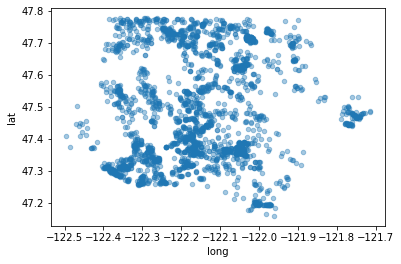

In [64]:
import matplotlib.pyplot as plt
df_clean.plot(kind="scatter", x="long", y="lat", alpha=0.4)
plt.show();

In [65]:
home_locations = df_clean[["lat", "long", "id"]]

In [66]:
import pandas as pd
import folium

map = folium.Map(location=[home_locations.lat.mean(), 
                           home_locations.long.mean()], zoom_start=14, control_scale=True)

map

In [67]:
for index, location_info in home_locations.iterrows():
    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info["id"]).add_to(map)


In [68]:
map

### Checking correlations with Price

In [69]:
data_clean.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.608586
sqft_above       0.538614
bathrooms        0.480284
sqft_patio       0.313787
bedrooms         0.288992
sqft_garage      0.263655
sqft_basement    0.244938
floors           0.180555
yr_built         0.095728
sqft_lot         0.086562
yr_renovated     0.085039
price_sqft       0.069595
lat              0.063419
id               0.034035
long             0.022271
Name: price, dtype: float64

In [70]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30110 non-null  int64  
 1   date           30110 non-null  object 
 2   price          30110 non-null  float64
 3   bedrooms       30110 non-null  int64  
 4   bathrooms      30110 non-null  float64
 5   sqft_living    30110 non-null  int64  
 6   sqft_lot       30110 non-null  int64  
 7   floors         30110 non-null  float64
 8   waterfront     30110 non-null  object 
 9   greenbelt      30110 non-null  object 
 10  nuisance       30110 non-null  object 
 11  view           30110 non-null  object 
 12  condition      30110 non-null  object 
 13  grade          30110 non-null  object 
 14  heat_source    30110 non-null  object 
 15  sewer_system   30110 non-null  object 
 16  sqft_above     30110 non-null  int64  
 17  sqft_basement  30110 non-null  int64  
 18  sqft_g

### Let's look at the two highest correlation values against price: sqft_living sqft_above

In [71]:
price_preds = data_clean[['sqft_living', 'sqft_above']]
y = data_clean['price']
preds_with_const = sm.add_constant(price_preds)

In [72]:
sqftmodel = sm.OLS(endog=y, exog=preds_with_const).fit()

In [73]:
sqftmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     8855.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:24:39   Log-Likelihood:            -4.4845e+05
No. Observations:               30110   AIC:                         8.969e+05
Df Residuals:                   30107   BIC:                         8.969e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -7.6e+04   9879.943     -7.692      0.000   -9.54e+04   -5.66e+04
sqft_living   557.5539      8.999     61.956      0.000     539.915     575.193
sqft_above      3.6706      9.980      0.368      0.713     -15.892      23.233
==============================================================================
Omnibus:                    43384.180   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47179770.178
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.229   Cond. No.                     7.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- sqft_above has a p value of 0.713, yikes! Let's get rid of that value and try adding the next best coefficient to price: bathrooms.

### Sqft_living + bathrooms

In [74]:
price_preds2 = data_clean[['sqft_living', 'bathrooms']]
y = data_clean['price']
preds_with_const2 = sm.add_constant(price_preds2)

In [75]:
sqftmodel2 = sm.OLS(endog=y, exog=preds_with_const2).fit()

In [76]:
sqftmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     8865.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:24:39   Log-Likelihood:            -4.4845e+05
No. Observations:               30110   AIC:                         8.969e+05
Df Residuals:                   30107   BIC:                         8.969e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -9.74e+04   1.16e+04     -8.421      0.000    -1.2e+05   -7.47e+04
sqft_living   542.2833      6.627     81.827      0.000     529.294     555.273
bathrooms    2.582e+04   7262.677      3.556      0.000    1.16e+04    4.01e+04
==============================================================================
Omnibus:                    43385.641   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47035528.324
Skew:                           8.197   Prob(JB):                         0.00
Kurtosis:                     195.931   Cond. No.                     7.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Let's try building a model, this was for bathrooms and floors

In [77]:
# Select only the float datatypes
X_bathfloors = data_clean.select_dtypes(include=float)

In [78]:
X_dropprice = X_bathfloors.drop(columns=['price','lat','long'])

In [79]:
y = data_clean['price']

### Build Model

In [80]:
sm.OLS(endog = y, exog = X_dropprice).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.698
Model:                            OLS   Adj. R-squared (uncentered):              0.698
Method:                 Least Squares   F-statistic:                          2.318e+04
Date:                Wed, 15 Feb 2023   Prob (F-statistic):                        0.00
Time:                        20:24:39   Log-Likelihood:                     -4.5137e+05
No. Observations:               30110   AIC:                                  9.028e+05
Df Residuals:                   30107   BIC:                                  9.028e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bathrooms   4.897e+05   4816.460    101.666      0.000     4.8e+05    4.99e+05
floors     -2.842e+04   7318.599     -3.884      0.000   -4.28e+04   -1.41e+04
price_sqft    17.5730      1.293     13.586      0.000      15.038      20.108
==============================================================================
Omnibus:                    39590.120   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         24079520.053
Skew:                           6.999   Prob(JB):                         0.00
Kurtosis:                     140.831   Cond. No.                     6.74e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Take a look at the distribution of prices

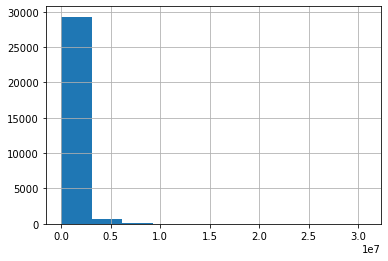

In [81]:
y.hist();

### If we transform with log what does this look like?

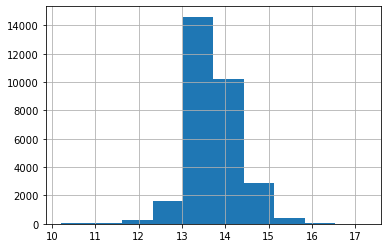

In [82]:
y_scld = np.log(y)
y_scld.hist();

- Looks more normally distributed

### Let's try scaling the price axis with a logarithmic transformation

In [83]:
model_price2 = sm.OLS(y_scld, preds_with_const2).fit()
model_price2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     9628.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:24:39   Log-Likelihood:                -18982.
No. Observations:               30110   AIC:                         3.797e+04
Df Residuals:                   30107   BIC:                         3.800e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.8998      0.007   1745.085      0.000      12.885      12.914
sqft_living     0.0003   4.24e-06     78.014      0.000       0.000       0.000
bathrooms       0.0588      0.005     12.672      0.000       0.050       0.068
==============================================================================
Omnibus:                     5755.384   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49708.357
Skew:                          -0.677   Prob(JB):                         0.00
Kurtosis:                       9.147   Cond. No.                     7.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Build model with log-scaled target

In [84]:
model_price = sm.OLS(y_scld, X_dropprice).fit()
model_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                          1.155e+05
Date:                Wed, 15 Feb 2023   Prob (F-statistic):                        0.00
Time:                        20:24:39   Log-Likelihood:                         -83605.
No. Observations:               30110   AIC:                                  1.672e+05
Df Residuals:                   30107   BIC:                                  1.672e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bathrooms      2.7013      0.024    113.086      0.000       2.655       2.748
floors         4.0434      0.036    111.397      0.000       3.972       4.115
price_sqft   6.04e-05   6.42e-06      9.415      0.000    4.78e-05     7.3e-05
==============================================================================
Omnibus:                      684.873   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              734.335
Skew:                          -0.371   Prob(JB):                    3.48e-160
Kurtosis:                       3.190   Cond. No.                     6.74e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### One-Hot Encoding Categorical Columns

In [85]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30110 non-null  int64  
 1   date           30110 non-null  object 
 2   price          30110 non-null  float64
 3   bedrooms       30110 non-null  int64  
 4   bathrooms      30110 non-null  float64
 5   sqft_living    30110 non-null  int64  
 6   sqft_lot       30110 non-null  int64  
 7   floors         30110 non-null  float64
 8   waterfront     30110 non-null  object 
 9   greenbelt      30110 non-null  object 
 10  nuisance       30110 non-null  object 
 11  view           30110 non-null  object 
 12  condition      30110 non-null  object 
 13  grade          30110 non-null  object 
 14  heat_source    30110 non-null  object 
 15  sewer_system   30110 non-null  object 
 16  sqft_above     30110 non-null  int64  
 17  sqft_basement  30110 non-null  int64  
 18  sqft_g

### Build Dummy Regressor

### Coding for In Seattle or Outside of Seattle

In [86]:
Seattle_postalcodes = [98133, 98125, 98115, 98117, 98107, 98103, 98105, 98199, 98119, 98109, 98102, 98112, 98185, 98145,
98195, 98191, 98181, 98154, 98164, 98121, 98101, 98104, 98122, 98134, 98144, 98124, 98116, 98136,
98126, 98106, 98108, 98118]

df_clean['in_Seattle'] = np.where(df_clean['postal_code'].isin(Seattle_postalcodes),1,0)

In [87]:
df_clean

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,postal_code,price_sqft,grade_code,condition_code,in_Seattle
21,2310000170,750000.0,3,2.0,1590,7754,1.0,440,0,1990,47.357065,-122.040670,98038,471.698113,7,4,0
25,2095600170,580000.0,3,3.0,2020,4482,1.0,600,120,1992,47.399470,-122.204130,98031,287.128713,7,3,0
26,8682282030,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,47.708760,-122.020730,98053,740.740741,9,3,0
34,5727500011,785000.0,3,2.0,1350,7354,1.0,460,120,1985,47.751020,-122.334470,98133,581.481481,7,5,1
39,1421059003,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,47.310595,-122.129380,98092,323.076923,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30119,3821400080,500000.0,3,2.5,1610,7250,1.0,490,270,1978,47.479820,-122.325620,98168,310.559006,7,3,0
30128,1761100480,560000.0,3,2.0,1480,8770,1.0,540,180,1985,47.287330,-122.362055,98023,378.378378,7,4,0
30138,2408100010,1011000.0,3,2.0,1460,10995,1.0,460,180,1981,47.645550,-122.108060,98052,692.465753,8,3,0
30142,2539500005,880000.0,4,2.5,2260,5661,1.0,460,230,2000,47.568800,-122.295505,98108,389.380531,8,3,1


In [89]:
data_relevant = df_clean.copy()


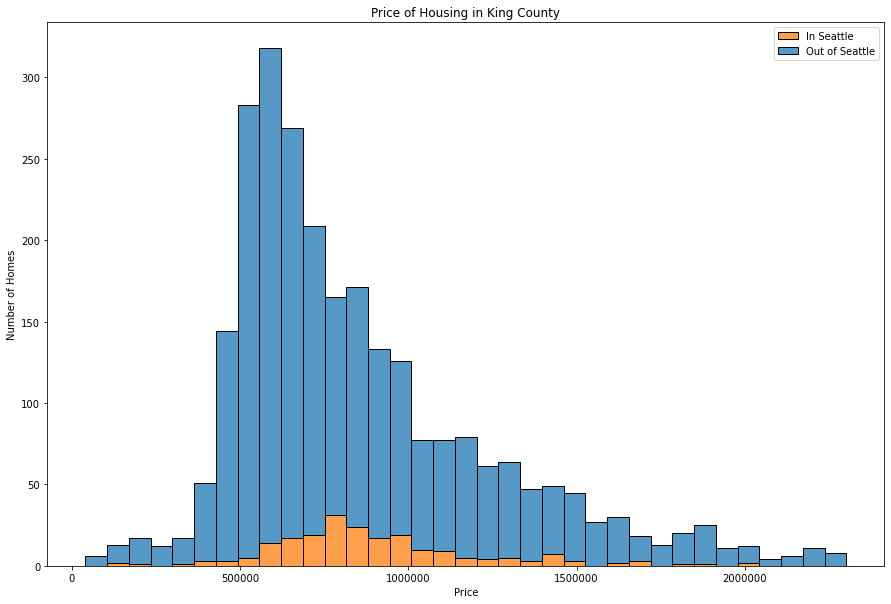

In [90]:
fig, ax = plt.subplots(figsize = (15 , 10))

import matplotlib.ticker as ticker

sns.histplot(data_relevant, x="price", hue="in_Seattle", multiple="stack")
plt.legend(loc='upper right', labels=['In Seattle', 'Out of Seattle'])
ax.set_xlabel('Price')
ax.set_ylabel('Number of Homes')
ax.set_title('Price of Housing in King County')
plt.ticklabel_format(style='plain',axis='x')

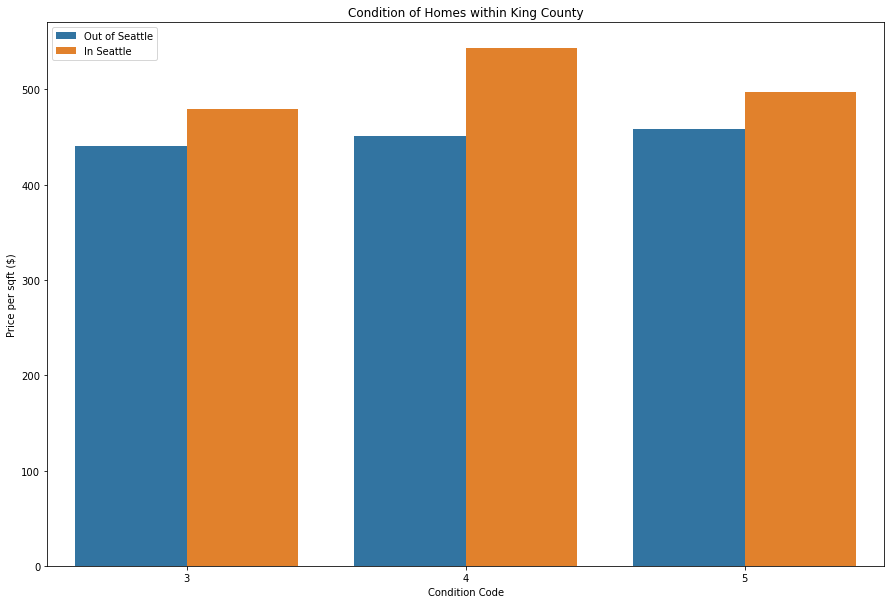

In [153]:
fig, ax = plt.subplots(figsize = (15 , 10))

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

sns.barplot(x=data_relevant["condition_code"], y=data_relevant['price_sqft'], hue=data_relevant["in_Seattle"], ci=None)

ax.legend(loc='upper left', labels=['Out of Seattle', 'In Seattle'], )
ax.set_xlabel('Condition Code')
ax.set_ylabel('Price per sqft ($)')
ax.set_title('Condition of Homes within King County')
plt.ticklabel_format(style='plain',axis='y')

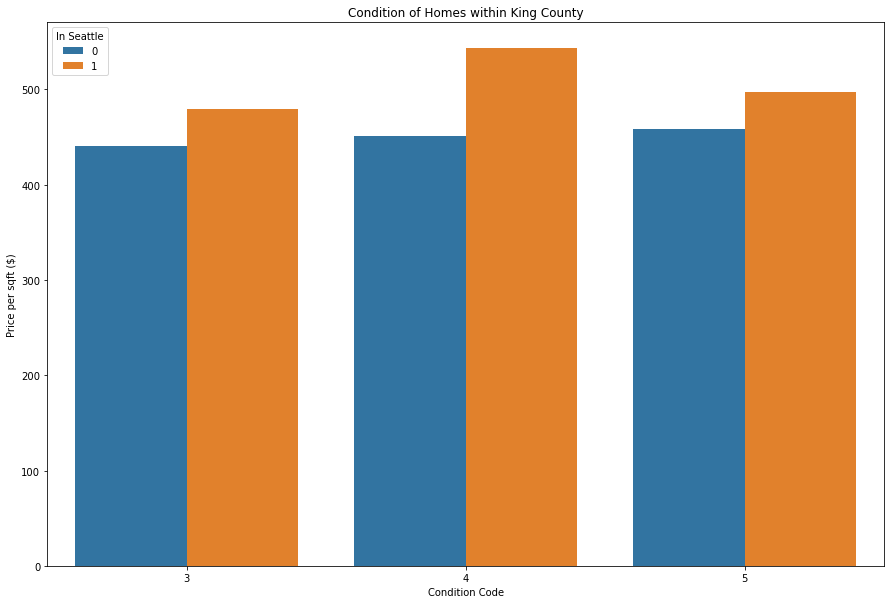

In [155]:
fig, ax = plt.subplots(figsize = (15 , 10))

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

sns.barplot(x=data_relevant["condition_code"], y=data_relevant['price_sqft'], hue=data_relevant["in_Seattle"], ci=None)

ax.set_xlabel('Condition Code')
ax.set_ylabel('Price per sqft ($)')
ax.set_title('Condition of Homes within King County')
plt.ticklabel_format(style='plain',axis='y')
plt.legend(loc='upper left', title='In Seattle');